In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def PVF(l, alpha, beta, p, q, f, h): #caso geral (muda a construção da mariz)
    n = int((l/h) - 1)
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h2 = h**2
    
    #Cria matriz
    a = -2 * np.ones((n,)) + h2 * q(xi) 
    b = np.ones((n,)) - h/2 * p(xi)
    c = np.ones((n,)) + h/2 * p(xi)
    
    A = np.diag(a) + np.diag(b[1:], -1) + np.diag(c[:-1], 1)
    
    F = h2 * np.ones((n,)) * f(xi)
    F[0] -= alpha * b[0]
    F[-1] -= beta * c[-1]
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = np.linalg.solve(A, F)
    return y, x

# 1. Resolva numericamente as equações:

## a) u''(x) - u'(x) - 2u(x) = cos(x),  0 < x < pi/2
##    k = 1
##    p(x) = - 1
##    q(x) = - 2
##    f(x) = cos(x)

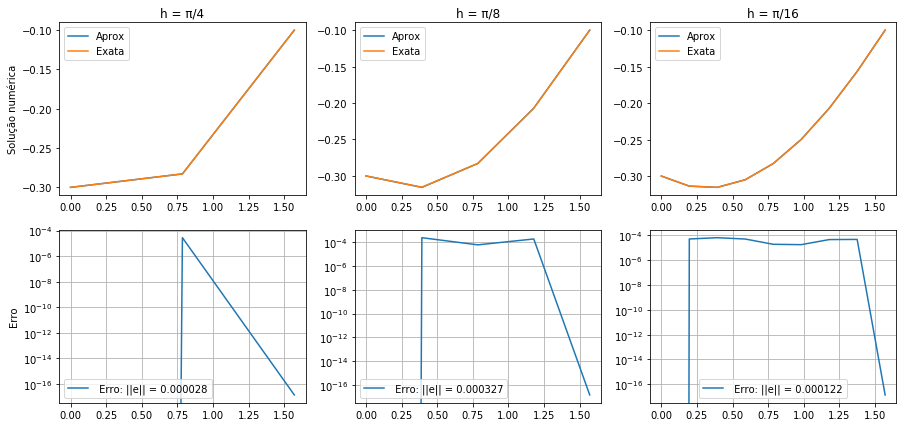

In [3]:
l = np.pi/2
alpha = -0.3
beta = -0.1
p = lambda x: - 1
q = lambda x: - 2
f = lambda x: np.cos(x)
exata = lambda x: -1*(np.sin(x) + 3*np.cos(x))/10


fig, ax = plt.subplots(2, 3)
fig.set_figheight(7)
fig.set_figwidth(15)

#h = π/4
y, x = PVF(l, alpha, beta, p, q, f, np.pi/4)
ax[0][0].plot(x, y, label = 'Aprox')
ax[0][0].plot(x, exata(x), label = 'Exata')
ax[0][0].legend()
ax[0][0].set_title('h = π/4')

erro = np.abs(exata(x) - y)
ax[1][0].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][0].set_yscale('log')
ax[1][0].legend()
ax[1][0].grid()

#h = π/8
y, x = PVF(l, alpha, beta, p, q, f, np.pi/8)
ax[0][1].plot(x, y, label = 'Aprox')
ax[0][1].plot(x, exata(x), label = 'Exata')
ax[0][1].legend()
ax[0][1].set_title('h = π/8')

erro = np.abs(exata(x) - y)
ax[1][1].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][1].set_yscale('log')
ax[1][1].legend()
ax[1][1].grid()


#h = π/16
y, x = PVF(l, alpha, beta, p, q, f, np.pi/16)
ax[0][2].plot(x, y, label = 'Aprox')
ax[0][2].plot(x, exata(x), label = 'Exata')
ax[0][2].legend()
ax[0][2].set_title('h = π/16')

erro = np.abs(exata(x) - y)
ax[1][2].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][2].set_yscale('log')
ax[1][2].legend()
ax[1][2].grid()


aux = ax.flat[0].set(ylabel='Solução numérica')
aux = ax.flat[3].set(ylabel='Erro')

## b) 2x²u''(x) + x³u'(x) - 4u(x) + (x^5 + 8x³)sin(x) = 0 (dividindo por 2x²)
## u''(x) + (x/2)u'(x) - (2/x²)u(x) + ((x³ + 8x)/2)sin(x) = 0,  0 < x < 2pi
##    k = 1
##    p(x) = x/2
##    q(x) = - (2/x²)
##    f(x) = - ((x³ + 8x)/2)sin(x)

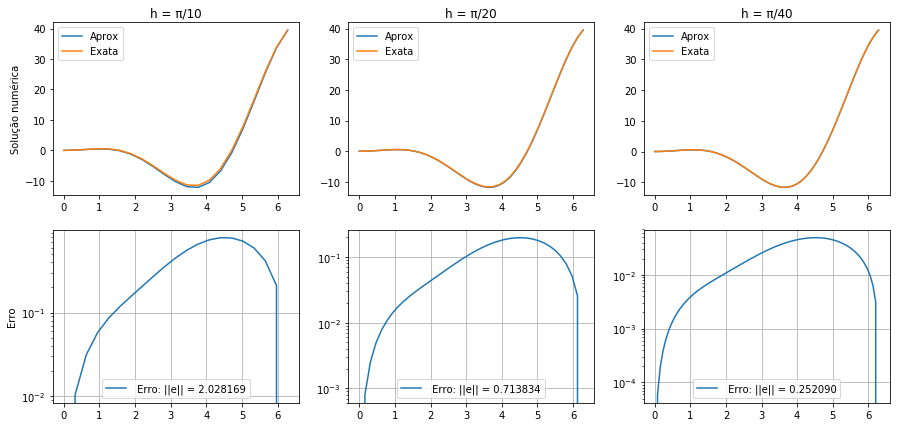

In [4]:
l = 2*np.pi
alpha = 0
beta = 4*(np.pi**2)
p = lambda x: x/2
q = lambda x: - (2/(x**2))
f = lambda x: -((x**3 + 8*x)/2)*np.sin(x)
exata = lambda x: (x**2)*np.cos(x)


fig, ax = plt.subplots(2, 3)
fig.set_figheight(7)
fig.set_figwidth(15)

#h = π/10
y, x = PVF(l, alpha, beta, p, q, f, np.pi/10)
ax[0][0].plot(x, y, label = 'Aprox')
ax[0][0].plot(x, exata(x), label = 'Exata')
ax[0][0].legend()
ax[0][0].set_title('h = π/10')

erro = np.abs(exata(x) - y)
ax[1][0].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][0].set_yscale('log')
ax[1][0].legend()
ax[1][0].grid()

#h = π/20
y, x = PVF(l, alpha, beta, p, q, f, np.pi/20)
ax[0][1].plot(x, y, label = 'Aprox')
ax[0][1].plot(x, exata(x), label = 'Exata')
ax[0][1].legend()
ax[0][1].set_title('h = π/20')

erro = np.abs(exata(x) - y)
ax[1][1].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][1].set_yscale('log')
ax[1][1].legend()
ax[1][1].grid()


#h = π/40
y, x = PVF(l, alpha, beta, p, q, f, np.pi/40)
ax[0][2].plot(x, y, label = 'Aprox')
ax[0][2].plot(x, exata(x), label = 'Exata')
ax[0][2].legend()
ax[0][2].set_title('h = π/40')

erro = np.abs(exata(x) - y)
ax[1][2].plot(x, erro, label = ' Erro: ||e|| = %f' % (np.linalg.norm(erro))) 
ax[1][2].set_yscale('log')
ax[1][2].legend()
ax[1][2].grid()


aux = ax.flat[0].set(ylabel='Solução numérica')
aux = ax.flat[3].set(ylabel='Erro')

In [5]:
#Nesse exercício observa-se que a medida que diminuímos h (h->0), o ||e|| diminuí (||e||->0), dessa forma, o método numérico é consistente;

# 2. Para visualizar uma instabilidade numérica, resolva o seguinte problema, utilizando N = 10, 20 e 120.
## 10^(-2)y''(x) - x²y'(x) - y(x) = 0 (dividindo por 10^(-2))
## y''(x) - 100x²y'(x) - 100y(x) = 0, 0 < x < 1
## k = 1
## p(x) = - 100x²
## q(x) = - 100
## f(x) = 0

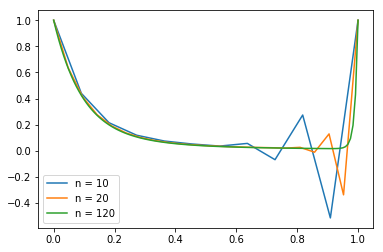

In [6]:
l = 1
alpha = 1
beta = 1
p = lambda x: - 100*(x**2)
q = lambda x: - 100
f = lambda x: 0

#Convertendo n para h (a função usa h como parâmetro)
y, x = PVF(l, alpha, beta, p, q, f, (l)/(10+1))
plt.plot(x, y, label = 'n = 10')

y, x = PVF(l, alpha, beta, p, q, f, (l)/(20+1))
plt.plot(x, y, label = 'n = 20')

y, x = PVF(l, alpha, beta, p, q, f, (l)/(120+1))
plt.plot(x, y, label = 'n = 120')
plt.legend()


In [7]:
#Nesse exercício observa-se que a medida que aumentamos n, ou seja, diminuímos o h, o método se comporta de um modo mais estável.

In [8]:
#y''(x) - 100x²y'(x) - 100y(x) = 0, 0 < x < 1
#p(x) = - 100x²
#q(x) = - 100 <= 0
#f(x) = 0
#max _(0<=x<=1) |p(x)| = max _(0<=x<=1) 100x² = 100 => h < 2/100
#Dessa forma, o método possui um comportamento mais estável com n=120 pois h=1/121 < 2/100, algo que não acontece para os outros dois valores de n (10 e 20)